<a href="https://colab.research.google.com/github/zazayudaperwira/bukutamu-app/blob/main/INDAThon_Round_1_Zaza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df = pd.read_csv("drive/MyDrive/Python/training_jumlah_penumpang_tj.csv", sep=";")

df = df["jumlah_penumpang"]
#traindata = df.loc[:,"jumlah_penumpang"]
#print(traindata)
#plt.plot(traindata)
#plt.show()

print(df)

0       8738599
1       7630313
2       9383835
3       8832441
4       9035420
         ...   
103    25693459
104    26076085
105    29146729
106    29062581
107    28957580
Name: jumlah_penumpang, Length: 108, dtype: int64


In [21]:
# Membuat kolom rentang waktu
rentang_waktu = pd.date_range(start='1/1/2015', end='1/1/2024', freq='M')
data_series = pd.DataFrame(rentang_waktu, columns=['date'])

#Gabung data waktu dan series
data_series["penumpang"] = df
print(data_series)

          date  penumpang
0   2015-01-31    8738599
1   2015-02-28    7630313
2   2015-03-31    9383835
3   2015-04-30    8832441
4   2015-05-31    9035420
..         ...        ...
103 2023-08-31   25693459
104 2023-09-30   26076085
105 2023-10-31   29146729
106 2023-11-30   29062581
107 2023-12-31   28957580

[108 rows x 2 columns]


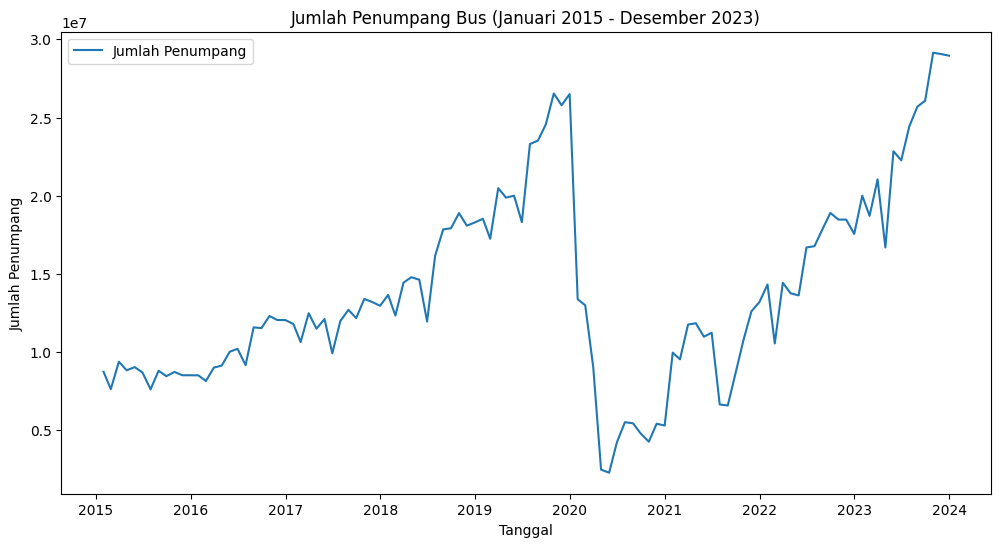

In [22]:
#melihat pola series
plt.figure(figsize=(12, 6))

data_series['date'] = pd.to_datetime(data_series['date'])
#filter
data_series = data_series[(data_series['date'] >= '0001-01-01') & (data_series['date'] <= '9999-12-31')]

plt.plot(data_series['date'], data_series['penumpang'], label='Jumlah Penumpang')
plt.title('Jumlah Penumpang Bus (Januari 2015 - Desember 2023)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()


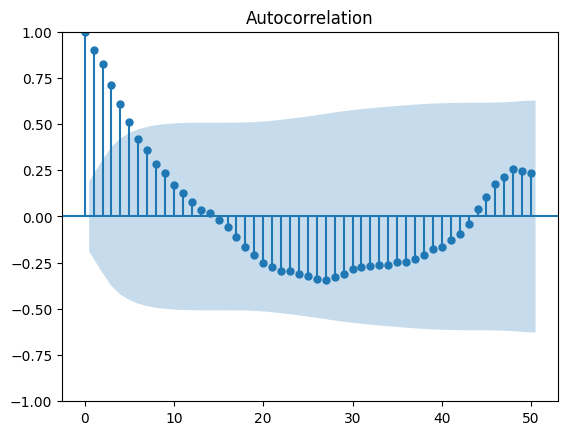

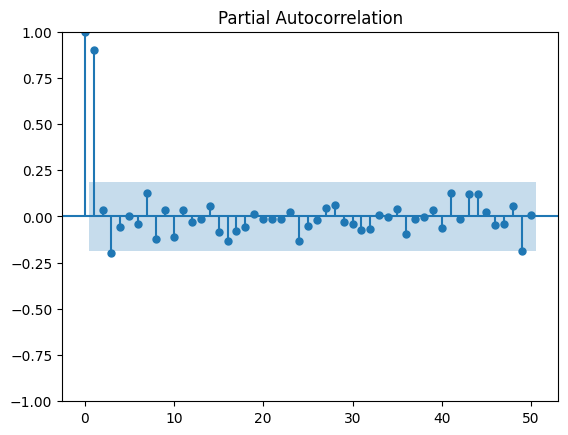

In [24]:
# CEK ACF dan PACF


plot_acf(data_series['penumpang'], lags=50)
plot_pacf(data_series['penumpang'], lags=50)
plt.show()

In [26]:
#model terbaik yang didapat dari trial berdasarkan plot ACF dan PACF, penulis memilih model berikut:
# non musiman p(1) d(1) q(1)
# musiman     P(1) D(1) Q(1) S(12)

#sehingga model sarima yang dibentuk sebagai berikut:
model = SARIMAX(data_series['penumpang'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [31]:
# Membuat prediksi jumlah penumpang Januari 2024 hingga Juni 2024
forecast = model_fit.get_forecast(steps=6)
predicted_passengers = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [41]:
# prediksi jumlah penumpang Januari 2024 hingga Juni 2024
for date, value in predicted_passengers.items():
    print(f"{date}: {value:.2f}")

108: 29238973.09
109: 27833858.49
110: 29568497.16
111: 27726496.84
112: 28882663.91
113: 29139565.35
